In [1]:
import sys
sys.path.append('/app')
sys.path.append('/app/submodules')

from src.visualizations import visualize_cameras, visualize_cameras_trajectorie

In [2]:
import torch

import lovely_tensors as lt
lt.monkey_patch()
import numpy as np

In [8]:
from pathlib import Path 

CO3DV2_DATASET_ROOT = '/app/data/datasets/'
category_name = 'car'
sequence_name='106_12650_23736'

In [11]:
from typing import List
from co3d.dataset.data_types import (
    load_dataclass_jgzip, FrameAnnotation, SequenceAnnotation
)
category_frame_annotations = load_dataclass_jgzip(
    f"{CO3DV2_DATASET_ROOT}/{category_name}/frame_annotations.jgz", List[FrameAnnotation]
)


seq_ann = [ann for ann in category_frame_annotations if ann.sequence_name == sequence_name]

seq_ann = sorted(seq_ann, key = lambda item: item.frame_number)


category_sequence_annotations = load_dataclass_jgzip(
    f"{CO3DV2_DATASET_ROOT}/{category_name}/sequence_annotations.jgz", List[SequenceAnnotation]
)

6

In [14]:
from PIL import Image
img = Image.open("/app/data/datasets/"+seq_ann[144].image.path)

In [18]:
from pytorch3d.renderer import (
    look_at_view_transform,
    PerspectiveCameras,
)

viewpoints = [ann.viewpoint for ann in seq_ann if ann.frame_number % 10 == 0]
img_paths = [ann.image.path for ann in seq_ann if ann.frame_number % 10 == 0]



R, T, pp, fl = [], [], [], []
for viewpoint in viewpoints:
    R.append(torch.tensor(viewpoint.R))
    T.append(torch.tensor(viewpoint.T))
    pp.append(torch.tensor(viewpoint.principal_point))
    fl.append(torch.tensor(viewpoint.focal_length))

R = torch.stack(R)
T = torch.stack(T)
pp = torch.stack(pp)
fl = torch.stack(fl)

cameras = PerspectiveCameras(
    R = R,
    T = T,
    principal_point = pp,
    focal_length = fl,
)

In [19]:
R_c2w = cameras.get_world_to_view_transform().inverse().get_matrix()[:, :3, :3]
T_c2w = cameras.get_world_to_view_transform().inverse().get_matrix()[:, -1, :3]

R_c2w, T_c2w

(tensor[20, 3, 3] n=180 x∈[-1.000, 0.998] μ=-0.118 σ=0.567,
 tensor[20, 3] n=60 x∈[-7.008, 7.925] μ=-0.114 σ=4.233)

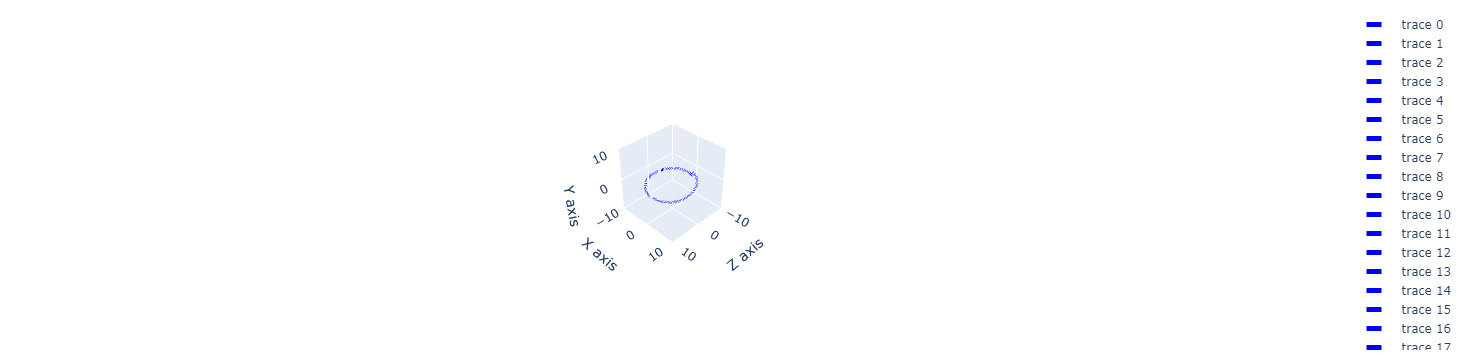

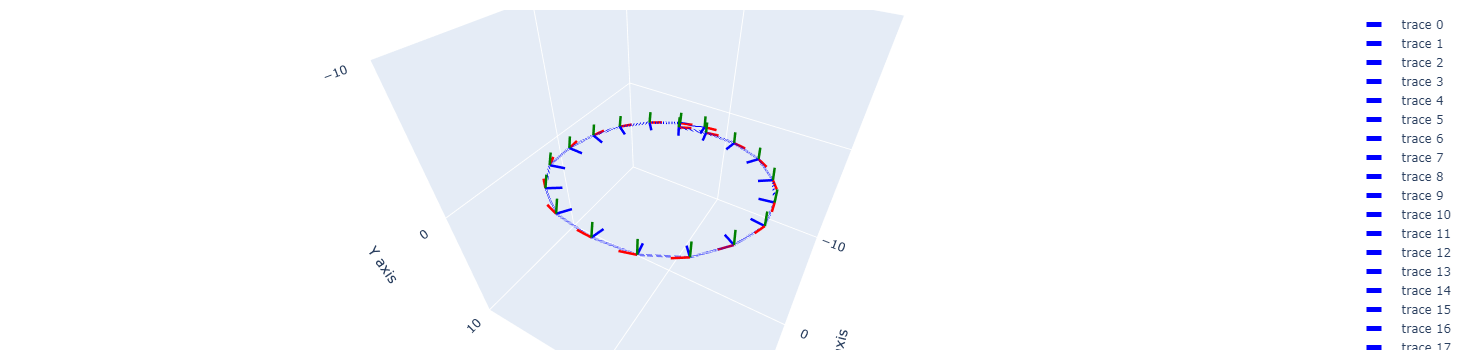

In [21]:
fig = visualize_cameras_trajectorie(T_c2w)
visualize_cameras(R_c2w, T_c2w, fig);